In [3]:
import matplotlib.pyplot as plt
import numpy as np

from utilities import discrete_weibull_pmf

In [4]:
def plot_example_intensity():
    """Illustrate how the intensity is given by the baseline
    intensity plus contributions from the Weibull distributions,
    mimicking intensity in the Hawkes Process analogue
    """

    # Create three nominal excitor edges. Different values for
    # the Weibull distributions illustrates the range of shapes
    # that it can take.
    excitor_one = {
        'start_time': 1,
        'weight': 0.8,
        'alpha': 6,
        'beta': 10
    }
    excitor_two = {
        'start_time': 5,
        'weight': 2,
        'alpha': 10,
        'beta': 1.5
    }
    excitor_three = {
        'start_time': 12,
        'weight': 0.5,
        'alpha': 3,
        'beta': 1
    }

    # Create a helper function that returns the
    # contribution from a particular Weibull distribution
    def intensity_from_excitor(excitor, time):
        if time >= excitor['start_time']:
            x = time - excitor['start_time']
            alpha = excitor['alpha']
            beta = excitor['beta']

            return excitor['weight']*discrete_weibull_pmf(x, alpha, beta)
        else:
            return 0

    # Set the length of the simulation
    total_days = 26

    # Define the baseline intensity
    baseline_intensity = np.array([0.05 for _ in range(total_days)])

    # Set up lists to store the intensity from each
    # of the excitors
    intensity_from_one = [0 for _ in range(total_days)]
    intensity_from_two = [0 for _ in range(total_days)]
    intensity_from_three = [0 for _ in range(total_days)]

    for time in range(total_days):
        # Excitor 1
        intensity_from_one[time] = \
            intensity_from_excitor(excitor_one, time-1)

        # Excitor 2
        intensity_from_two[time] = \
            intensity_from_excitor(excitor_two, time-1)

        # Excitor 2
        intensity_from_three[time] = \
            intensity_from_excitor(excitor_three, time-1)

    # Convert to numpy
    intensity_from_one = np.array(intensity_from_one)
    intensity_from_two = np.array(intensity_from_two)
    intensity_from_three = np.array(intensity_from_three)

    # Create the t values for the plots
    t = np.arange(total_days)

    # Plot as stacked bars
    plt.bar(
        t, baseline_intensity,
        color='gray', alpha=0.5,
        label='Spontaneous intensity')
    plt.bar(
        t, intensity_from_one,
        bottom=baseline_intensity+intensity_from_two,
        color='red', alpha=0.5,
        label='Intensity from excitor 1')
    plt.bar(
        t, intensity_from_two,
        bottom=baseline_intensity,
        color='green', alpha=0.5,
        label='Intensity from excitor 2')
    plt.bar(
        t, intensity_from_three,
        bottom=baseline_intensity+intensity_from_one
        +intensity_from_two,
        color='blue', alpha=0.5,
        label='Intensity from excitor 3')

    # Add a dotted line for the total intensity
    plt.plot(
        t,
        baseline_intensity+intensity_from_one
        +intensity_from_two+intensity_from_three,
        color='purple', linestyle='--', marker='o',
        label='Total intensity'
    )

    # Add coloured stars to indicate when each
    # excitor event occured
    plt.scatter(
        [excitor_one['start_time'],
        excitor_two['start_time'],
        excitor_three['start_time']],
        [0.025, 0.025, 0.025],
        marker='*', s=100,
        color=['red', 'green', 'blue'],
        label='Occurence of an excitor edge'
    )

    # Tidy the axes
    plt.xticks(2*np.arange(11))
    plt.xlim((-0.5, 20.5))
    plt.ylim((0, 0.6))

    # Add a legend to the plot
    plt.legend()

    # Add axis and plot titles
    plt.xlabel('Time ($t$)')
    plt.ylabel('Intensity')
    plt.title('The intensity of an edge with three excitor edges')

    # Display the plot
    plt.show()

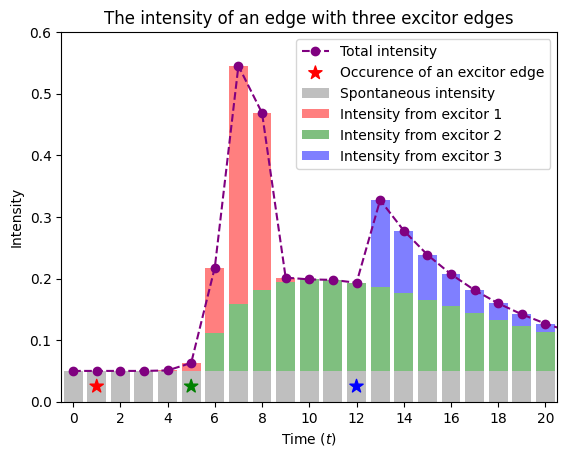

In [5]:
plot_example_intensity()